In [59]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
# sweep 50
#sweep = api.sweep("nicolas-debie-thesis/GAEC/la3svppn") 
# sweep 100
#sweep = api.sweep("nicolas-debie-thesis/GAEC/b5ov4eui")
# sweep 500
#sweep = api.sweep("nicolas-debie-thesis/GAEC/kattbknf")

runtime_runs = ['s8hucgpa','xxf8jnjq','mowno02k','hl2cgynw']
n_digits_runs = ['8fjy9f3e','6q2hevm9','hkkt6x0a','pfefhsjw']
classes_runtime_runs = ['4dusvzvo','0a91nlzg','1y45rgw9','1bvrq16w']
runs = [api.run(f"nicolas-debie-thesis/nesy/runs/{i}") for i in classes_runtime_runs]

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.head()

,summary,config,name
0,"{'test_acc_step': 0.9696969985961914, 'train_l...","{'epochs': 1, 'n_classes': 2, 'semantics': 'Su...",nesy_classes_runtime2
1,"{'trainer/global_step': 36, '_wandb': {'runtim...","{'epochs': 1, 'n_classes': 3, 'semantics': 'Su...",nesy_classes_runtime3
2,"{'reasoning_time_epoch': 0.44745028018951416, ...","{'epochs': 1, 'n_classes': 4, 'semantics': 'Su...",nesy_classes_runtime4
3,"{'_wandb': {'runtime': 183}, 'test_acc_epoch':...","{'epochs': 1, 'n_classes': 5, 'semantics': 'Su...",nesy_classes_runtime5


In [60]:
summary_flattened = runs_df.summary.apply(pd.Series)
config_flattened = runs_df.config.apply(pd.Series)

combined_df = pd.concat([summary_flattened, config_flattened], axis=1)

In [61]:
combined_df.head()
print(combined_df.columns)

Index(['test_acc_step', 'train_loss_epoch', 'epoch', '_wandb', '_timestamp',
       '_step', '_runtime', 'reasoning_time_epoch', 'neural_facts',
       'test_acc_epoch', 'non_neural_facts', 'trainer/global_step',
       'evaluation_time_epoch', 'evaluation_time_step', 'train_loss_step',
       'reasoning_time_step', 'epochs', 'n_classes', 'semantics', 'batch_size',
       'test_examples', 'train_examples'],
      dtype='object')


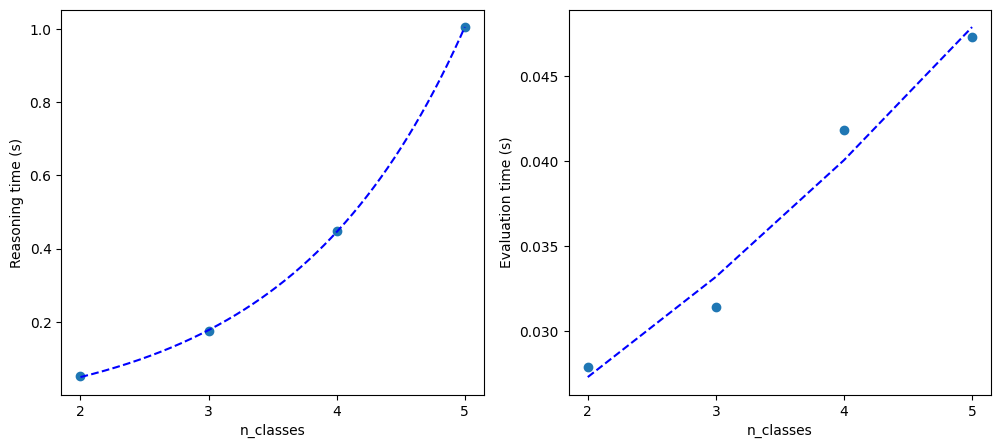

In [65]:
import numpy as np
# make a matplotlib plot with x axis n_classes and y_axis the reasoning_time_epoch and another plot with evaluation_time_epoch
import matplotlib.pyplot as plt
import scipy

def exponential(x,a,k,b):
    return a*np.exp(k*x)+b

fig, ax = plt.subplots(1,2, figsize=(12,5))

### Reasoning time
ax[0].scatter(combined_df['n_classes'], combined_df['reasoning_time_epoch'])
ax[0].set_xlabel('n_classes')
ax[0].set_ylabel('Reasoning time (s)')
# set x-axis ticks to integers and enable grid
ax[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_classes'], combined_df['reasoning_time_epoch'], 2)
p = np.poly1d(z)
popt,pcov = scipy.optimize.curve_fit(exponential, combined_df['n_classes'], combined_df['reasoning_time_epoch'])
x_fit = np.linspace(np.min(combined_df['n_classes']), np.max(combined_df['n_classes']), 1000)
y_fit = exponential(x_fit, *popt)
#ax[0].plot(combined_df['n_arguments'], p(combined_df['n_arguments']), "b--")
ax[0].plot(x_fit, y_fit, "b--")

### Evaluation time
ax[1].scatter(combined_df['n_classes'], combined_df['evaluation_time_epoch'])
ax[1].set_xlabel('n_classes')
ax[1].set_ylabel('Evaluation time (s)')
# set x-axis ticks to integers
ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_classes'], combined_df['evaluation_time_epoch'], 2)
p = np.poly1d(z)
ax[1].plot(combined_df['n_classes'], p(combined_df['n_classes']), "b--")

plt.show()

In [38]:
combined_df.head()

,_wandb,train_loss_epoch,reasoning_time_step,epoch,_runtime,trainer/global_step,reasoning_time_epoch,_step,neural_facts,evaluation_time_step,...,train_loss_step,non_neural_facts,evaluation_time_epoch,epochs,n_classes,semantics,batch_size,n_arguments,test_examples,train_examples
0,{'runtime': 44},0.004350,0.011152,9,45.623843,499,0.023437,119,4,0.005056,...,0.001370,4,0.010193,10,2,SumProductSemiring,128,2,1057,6332
1,{'runtime': 96},0.009197,0.103392,9,96.973802,329,0.106504,85,6,0.027399,...,0.001574,8,0.028808,10,2,SumProductSemiring,128,3,705,4221
2,{'runtime': 258},0.013280,0.379868,9,259.651249,249,0.435633,74,8,0.042960,...,0.002609,16,0.063647,10,2,SumProductSemiring,128,4,528,3166
3,{'runtime': 880},0.022278,1.522199,9,881.583214,199,1.902168,63,10,0.113144,...,0.015161,32,0.144991,10,2,SumProductSemiring,128,5,423,2533


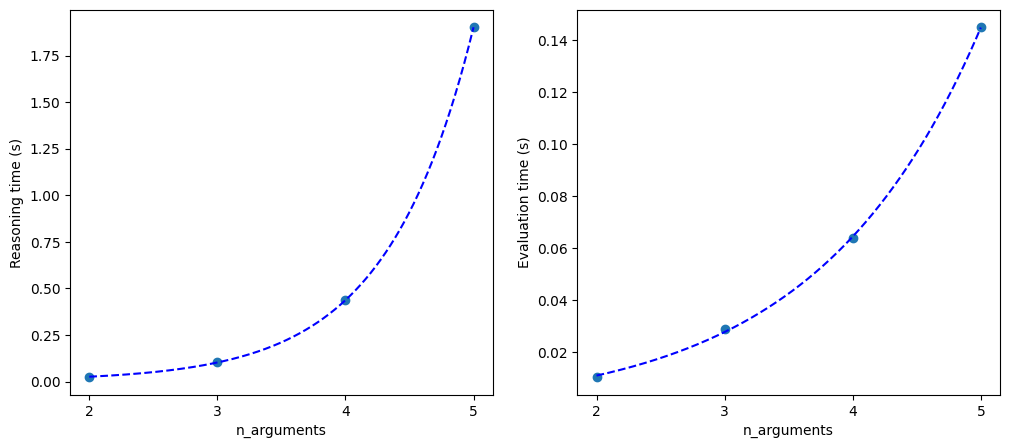

In [58]:
import numpy as np
# make a matplotlib plot with x axis n_classes and y_axis the reasoning_time_epoch and another plot with evaluation_time_epoch
import matplotlib.pyplot as plt
import scipy

def exponential(x,a,k,b):
    return a*np.exp(k*x)+b

fig, ax = plt.subplots(1,2, figsize=(12,5))

### Reasoning time
ax[0].scatter(combined_df['n_arguments'], combined_df['reasoning_time_epoch'])
ax[0].set_xlabel('n_arguments')
ax[0].set_ylabel('Reasoning time (s)')
# set x-axis ticks to integers and enable grid
ax[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_arguments'], combined_df['reasoning_time_epoch'], 2)
p = np.poly1d(z)
popt,pcov = scipy.optimize.curve_fit(exponential, combined_df['n_arguments'], combined_df['reasoning_time_epoch'])
x_fit = np.linspace(np.min(combined_df['n_arguments']), np.max(combined_df['n_arguments']), 1000)
y_fit = exponential(x_fit, *popt)
#ax[0].plot(combined_df['n_arguments'], p(combined_df['n_arguments']), "b--")
ax[0].plot(x_fit, y_fit, "b--")

### Evaluation time
ax[1].scatter(combined_df['n_arguments'], combined_df['evaluation_time_epoch'])
ax[1].set_xlabel('n_arguments')
ax[1].set_ylabel('Evaluation time (s)')
# set x-axis ticks to integers
ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_arguments'], combined_df['evaluation_time_epoch'], 2)
p = np.poly1d(z)
x_fit = np.linspace(np.min(combined_df['n_arguments']), np.max(combined_df['n_arguments']), 1000)
popt,pcov = scipy.optimize.curve_fit(exponential, combined_df['n_arguments'], combined_df['evaluation_time_epoch'])
y_fit = exponential(x_fit, *popt)
#ax[1].plot(combined_df['n_arguments'], p(combined_df['n_arguments']), "b--")
ax[1].plot(x_fit, y_fit, "b--")
plt.show()




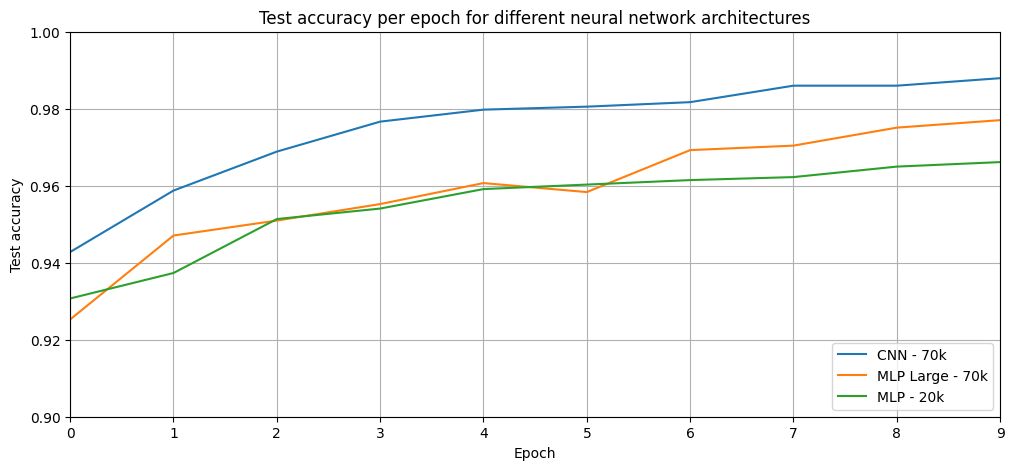

In [111]:
# read the data from the csv file
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/CNN.csv')
fig, ax = plt.subplots(1,1, figsize=(12,5))
# plot the data
plt.plot(df['epoch'],df['conv_5 - test_acc_epoch'], label='CNN - 70k')
plt.plot(df['epoch'],df['MLP_Large_5 - test_acc_epoch'], label='MLP Large - 70k')
plt.plot(df['epoch'],df['mlp_5 - test_acc_epoch'], label='MLP - 20k')
plt.title('Test accuracy per epoch for different neural network architectures')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.xlim(0,9)
plt.ylim(0.90,1.0)
plt.grid()
plt.legend(loc = 'lower right')
plt.show()

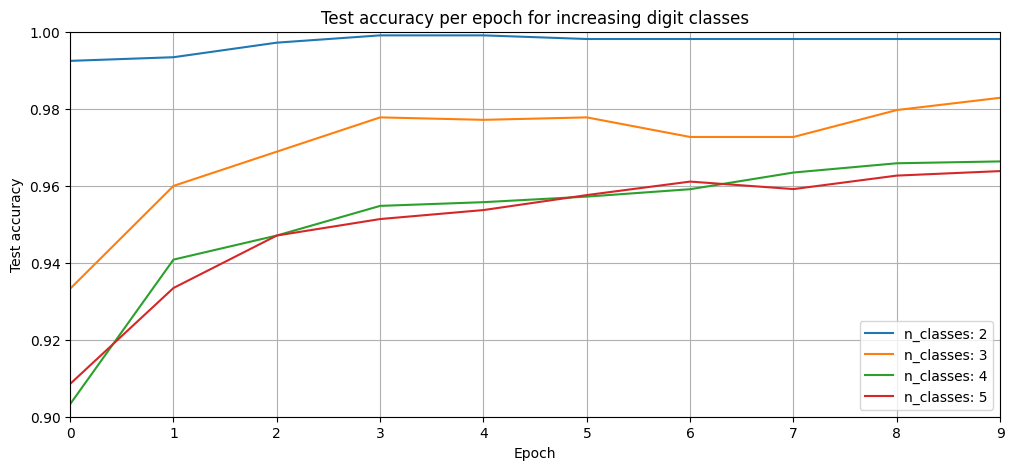

In [94]:
# read the data from the csv file
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/classes.csv')
# plot the data
fig, ax = plt.subplots(1,1, figsize=(12,5))
y = [f"nesy_classes_{i} - test_acc_epoch" for i in range(2,6)]
for j,i in enumerate(y):
    plt.plot(df['epoch'],df[i], label= f"n_classes: {j+2}")
plt.title('Test accuracy per epoch for increasing digit classes')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.xlim(0,9)
plt.ylim(0.90,1.0)
plt.grid()
plt.legend()
plt.show()

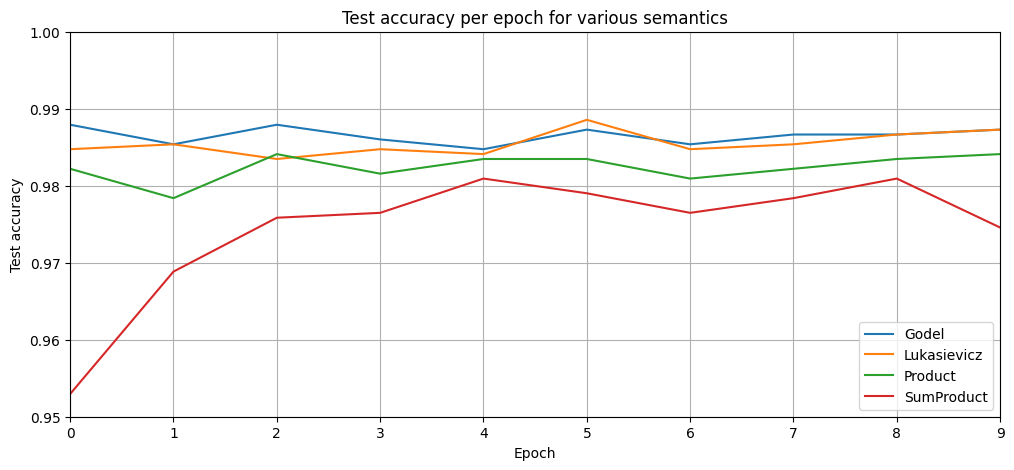

In [101]:
# read the data from the csv file

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/semantics.csv')
# plot the data
fig, ax = plt.subplots(1,1, figsize=(12,5))
y = ['nesy_semanticsGodelTNorm + 3 - test_acc_epoch','nesy_semanticsLukasieviczTNorm + 3 - test_acc_epoch','nesy_semanticsProductTNorm + 3 - test_acc_epoch','nesy_semanticsSumProductSemiring + 3 - test_acc_epoch']
plt.plot(df['epoch'],df[y[0]], label= 'Godel')
plt.plot(df['epoch'],df[y[1]], label= 'Lukasievicz')
plt.plot(df['epoch'],df[y[2]], label= 'Product')
plt.plot(df['epoch'],df[y[3]], label= 'SumProduct')

plt.title('Test accuracy per epoch for various semantics')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.xlim(0,9)
plt.ylim(0.95,1.0)
plt.grid()
plt.legend(loc='lower right')
plt.show()

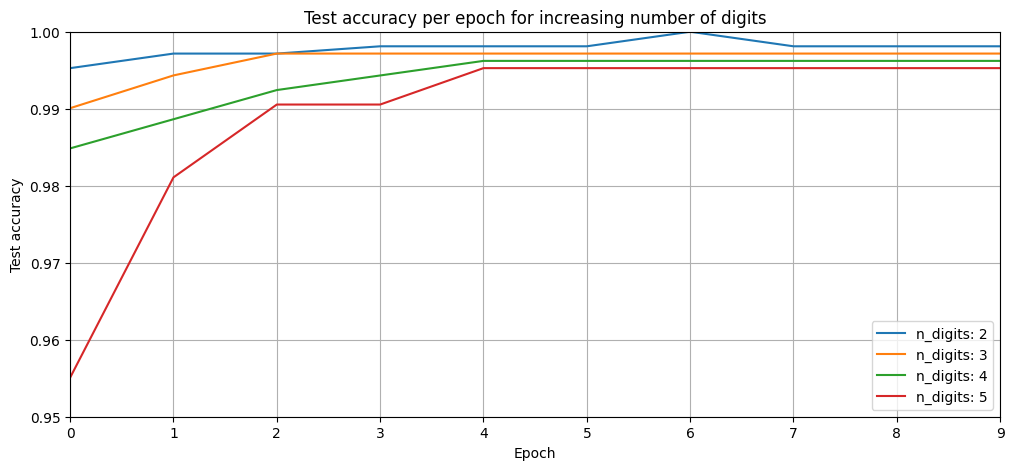

In [104]:
# read the data from the csv file
from turtle import pos
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/ndigits.csv')
# plot the data
fig, ax = plt.subplots(1,1, figsize=(12,5))
y = [f"nesy_arguments_runtime{i} - test_acc_epoch" for i in range(2,6)]
for j,i in enumerate(y):
    plt.plot(df['epoch'],df[i], label= f"n_digits: {j+2}")

plt.title('Test accuracy per epoch for increasing number of digits')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.xlim(0,9)
plt.ylim(0.95,1.0)
plt.grid()
plt.legend(loc='lower right')
plt.show()

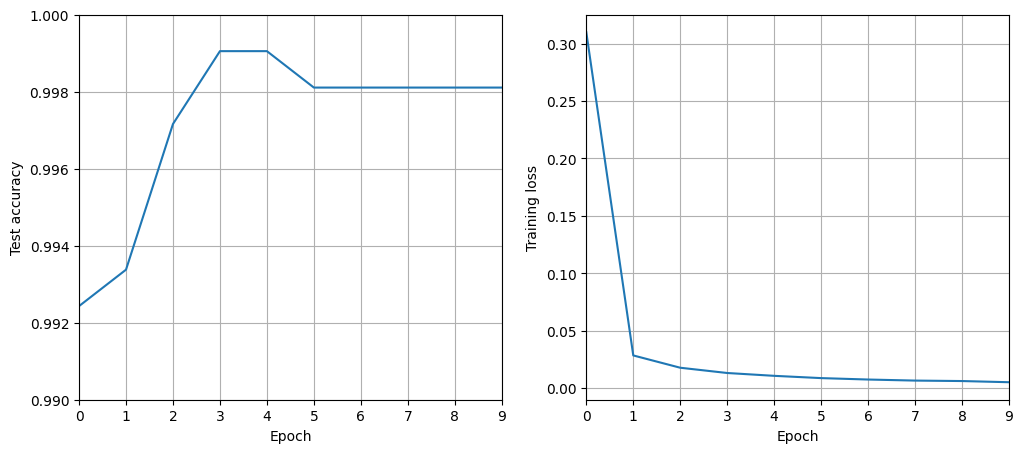

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/TrainingLoss.csv')
df2 = pd.read_csv('Data/TestAcc.csv')

# plot the data
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(df['epoch'],df2['nesy_classes_2 - test_acc_epoch'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Test accuracy')
ax[0].set_xlim(0,9)
ax[0].set_ylim(0.99,1.0)
ax[0].grid()


ax[1].plot(df['epoch'],df['nesy_classes_2 - train_loss_epoch'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Training loss')
ax[1].set_xlim(0,9)
ax[1].grid()